In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Let’s say we have a fictional dataset of pairs of variables, a mother and her daughter’s heights:  
height of mother(x)/daughter (y) pairs  
Create a CSV file for the above training data and write a Python function program to find the fitted linear  
regression with gradient descent technique. Compare the coefficients obtained from the sklearn model with  
your program. Compute the error, MSE and RMSE. Plot the graph Daughter height (Y-axis) vs Mother height  
(X-axis) with blue colour. Also, plot the line of best fit with red colour. Predict her daughter’s height with  
given a new mother height as 63. Plot the graph of error in y-axis and iteration in x-axis with 4 epochs (6x4=24  
iterations).

In [6]:
"""
Create a CSV file for the above training data
"""

data = """
m_height,d_height
58,60
62,60
60,58
64,60
67,70
70,72
"""

with open('data.csv', 'w') as f:
    f.write(data.strip())

In [110]:
"""
write a Python function program to find the fitted linear
regression with gradient descent technique
"""
import snoop


def sgd(df, learning_rate=0.0001, epochs=20):
    X = df['m_height']
    y = df['d_height']
    
    B0 = 0.0
    B1 = 0.0
    
    n = X.shape[0]
    
    for epoch in range(epochs): 
        for i in range(n):
            xi = X[i]
            yi = y[i]
            
            # Make prediction
            pi = B0 + B1 * xi
            
            # Calculate error
            error = pi - yi
            
            # Update coefficients
            B0 = B0 - learning_rate * error
            B1 = B1 - learning_rate * error * xi
            
#     print(f'Final B0: {B0}')
#     print(f'Final B1: {B1}')
    return B0, B1
df = pd.read_csv('data.csv')
B0, B1 = sgd(df)

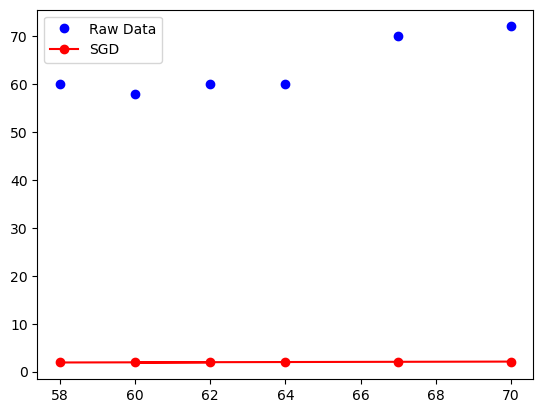

In [111]:
def plot_sgd(df):
    X = df['m_height']
    y = df['d_height']
    B0, B1 = sgd(df)
    
    y_pred = (B0 * X) + B1
    fig, ax = plt.subplots()
    ax.plot(X, y, 'bo', label='Raw Data')
    ax.plot(X, y_pred, 'ro-', label='SGD')
    ax.legend()
    plt.show()
    
plot_sgd(df)

Confusion Matrix:
[[19  0]
 [ 0 26]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



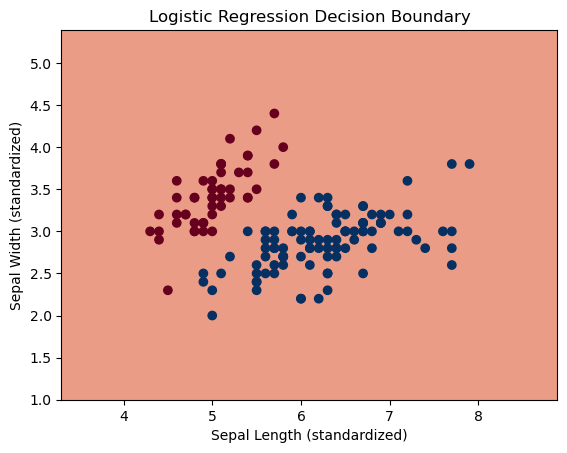

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2] # We'll use only the first two features for simplicity
y = (iris.target != 0) * 1 # Convert target labels to binary (0 or 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Create a logistic regression model
model = LogisticRegression(solver='liblinear')
# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Logistic Regression Decision Boundary')
plt.show()